# Importação


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar dados


In [2]:
df = pd.concat([load_iris(return_X_y= True, as_frame= True)[0],load_iris(return_X_y= True, as_frame= True)[1]], axis= 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Análise Exploratória


In [3]:
print(f"{df.dtypes}\n")
print(df.info())
display(df.describe())

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

df['species'] = df['target'].map(species_mapping)
df = df.drop('target', axis = 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


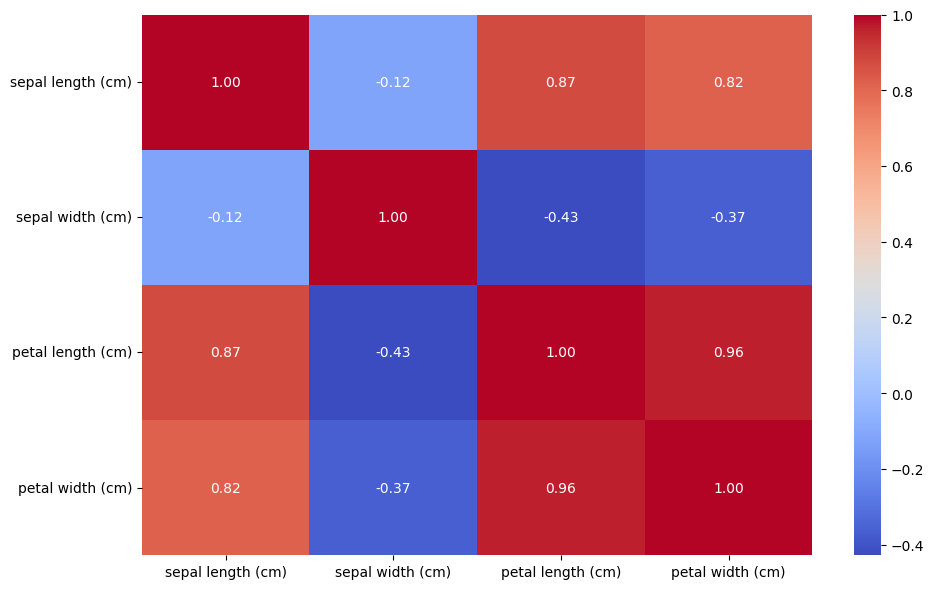

In [5]:
df_numeric = df.drop('species', axis=1)
corr = df_numeric.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)


plt.tight_layout()
plt.show()


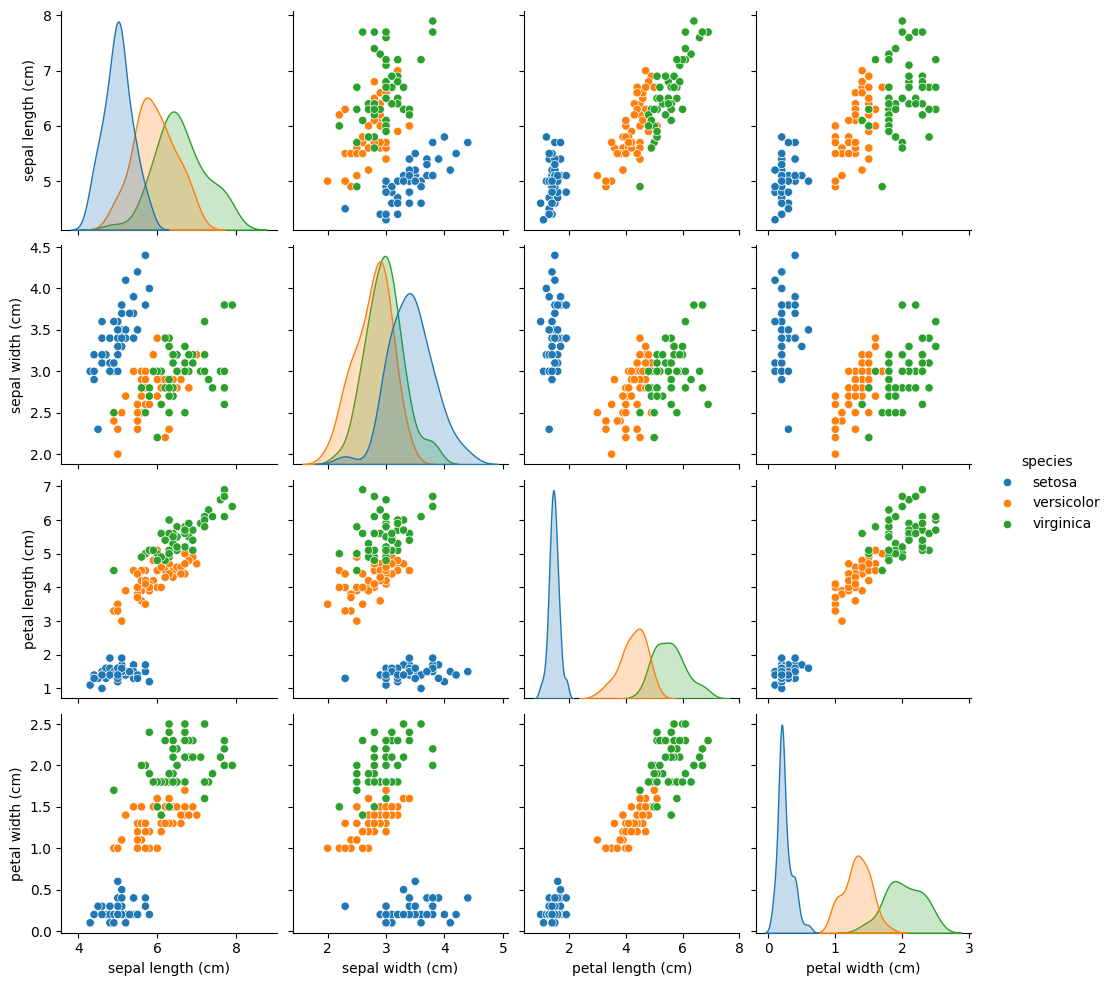

In [6]:
sns.pairplot(df, hue="species")  # Substitua "target" pela variável alvo
plt.show()

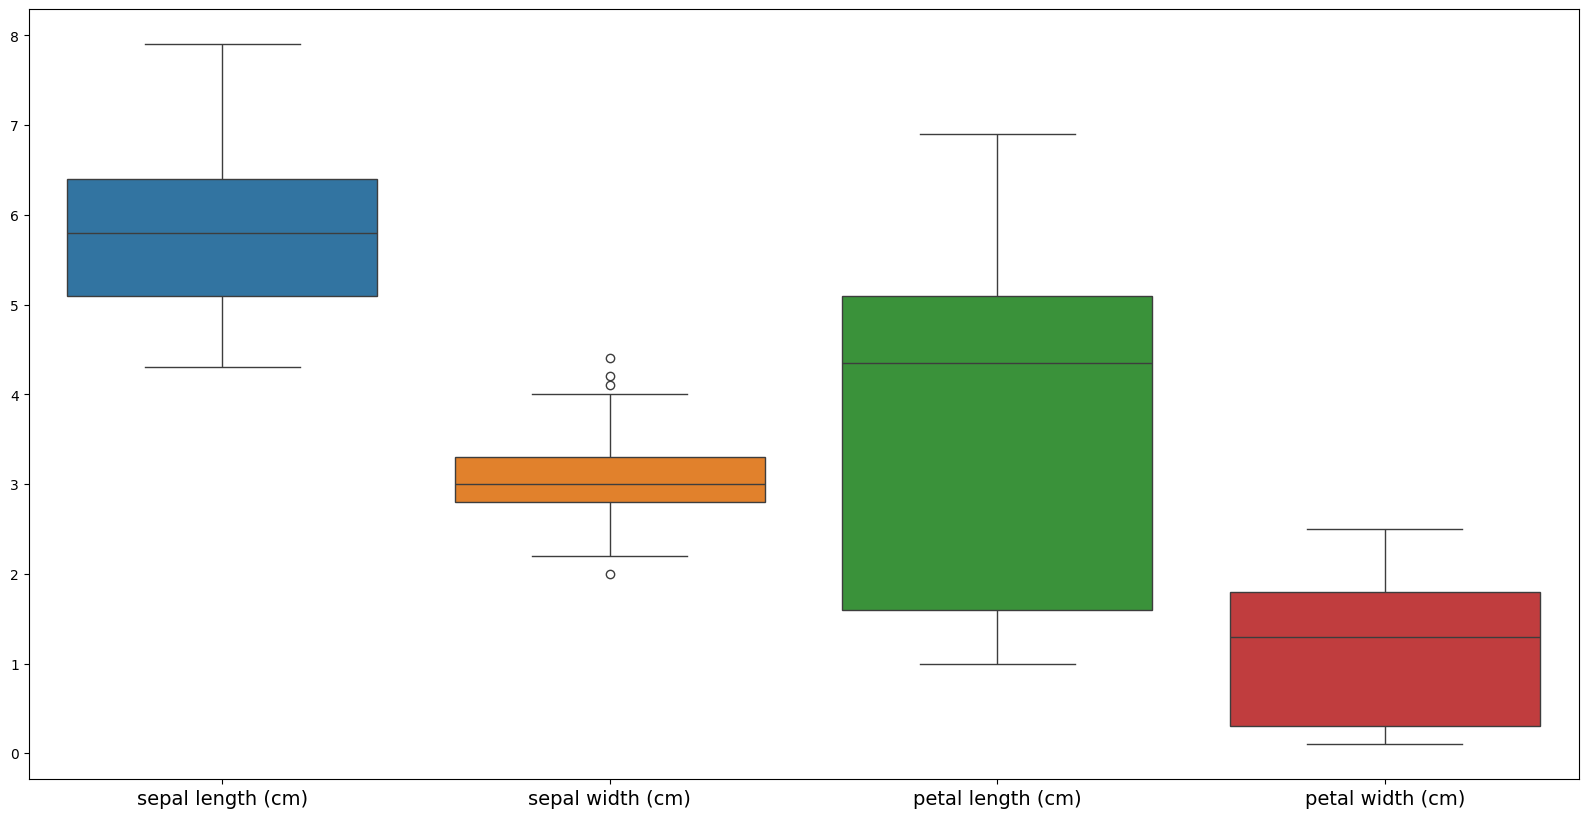

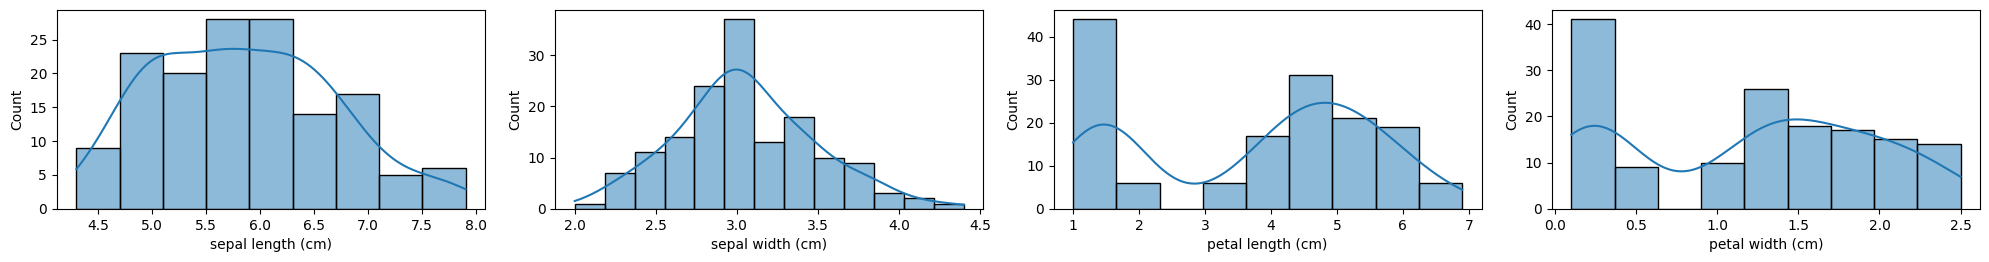

In [7]:
def boxplot(df: pd.DataFrame):
    df_numeric = df.drop('species', axis=1)

    plt.figure(figsize = (20,10))
    plt.xticks(fontsize=14)

    sns.boxplot(data=df_numeric)
    plt.show()

def histogram(df: pd.DataFrame):
    columns_numerics = df.drop('species', axis=1).columns.tolist()
    
    plt.figure(figsize= (20,10))
    for i in range(len(columns_numerics)):
        plt.subplot(4,4,i+1)
        sns.histplot(data= df, x= columns_numerics[i], kde= True)
        #plt.title(columns_numerics[i])

    plt.tight_layout()
    plt.show()
    
boxplot(df)
histogram(df)

In [8]:
def detectar_outliers(df: pd.DataFrame, colunas: list, info: bool = False):
    all_outliers = {}
    
    for i in colunas:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Identificando os outliers
        outliers = df[(df[i] < limite_inferior) | (df[i] > limite_superior)]

        all_outliers[i] = outliers
        
        if info:
            print(f"Sobre a coluna {i}: O Limite inferior é {limite_inferior} e o superior é {limite_superior}")
            print(f"{len(outliers)} outliers na coluna {i}\n")
            
    return all_outliers

def remover_outliers(df: pd.DataFrame, colunas: list):
    for i in colunas:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Detecção de outliers
        outliers = detectar_outliers(df, [i], info=False)[i]
        
        # Calculando a média dos valores sem os outliers
        media_no_outliers = df[(df[i] >= limite_inferior) & (df[i] <= limite_superior)][i].mean()
        
        # Substituindo os outliers pela média
        df[i] = df[i].apply(
            lambda x: media_no_outliers if (x < limite_inferior or x > limite_superior) else x
        )
    return df

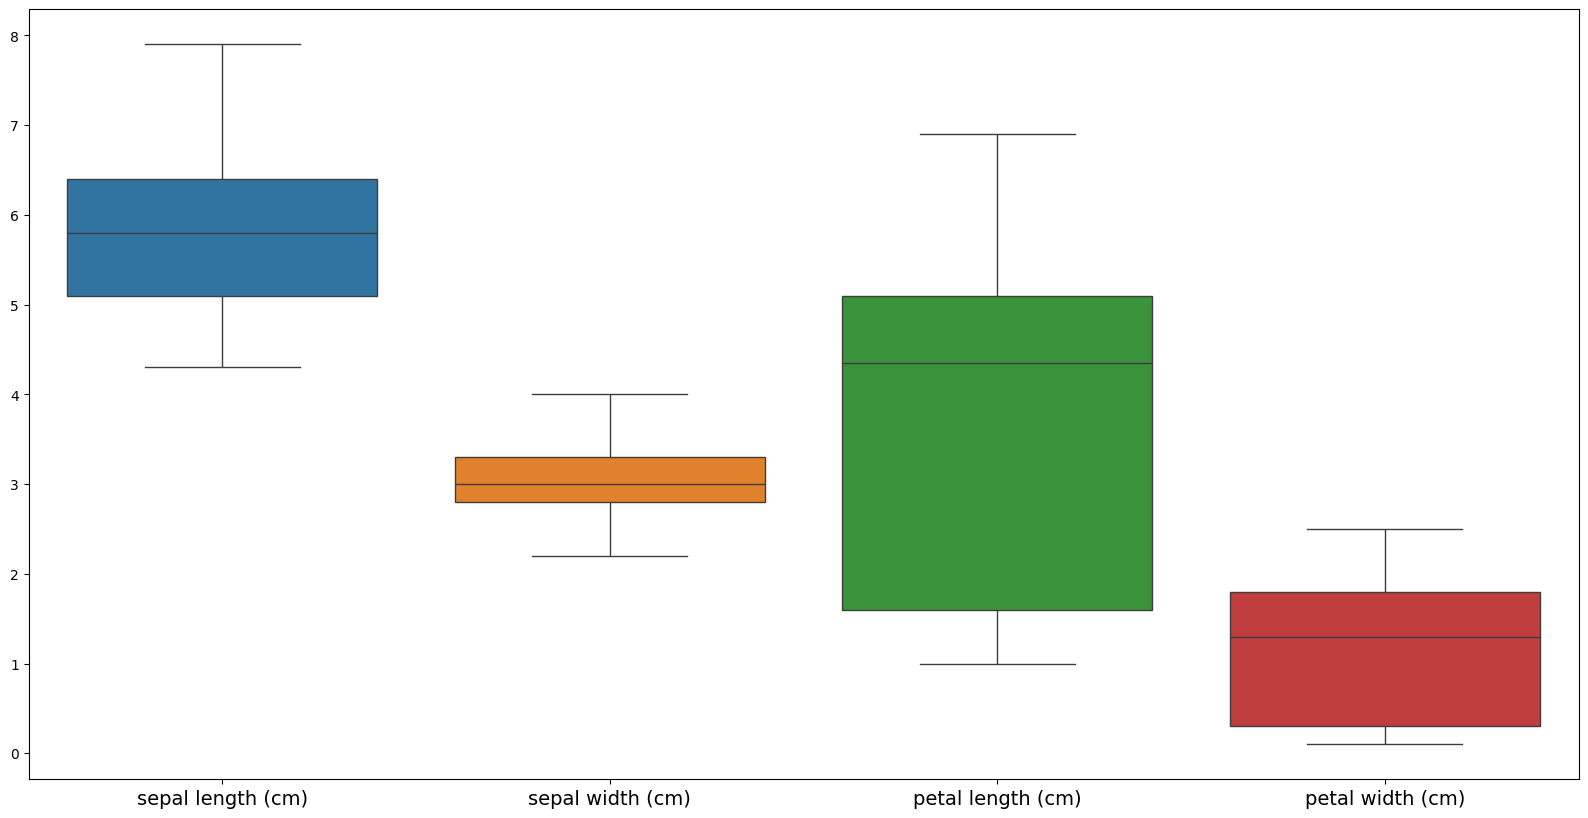

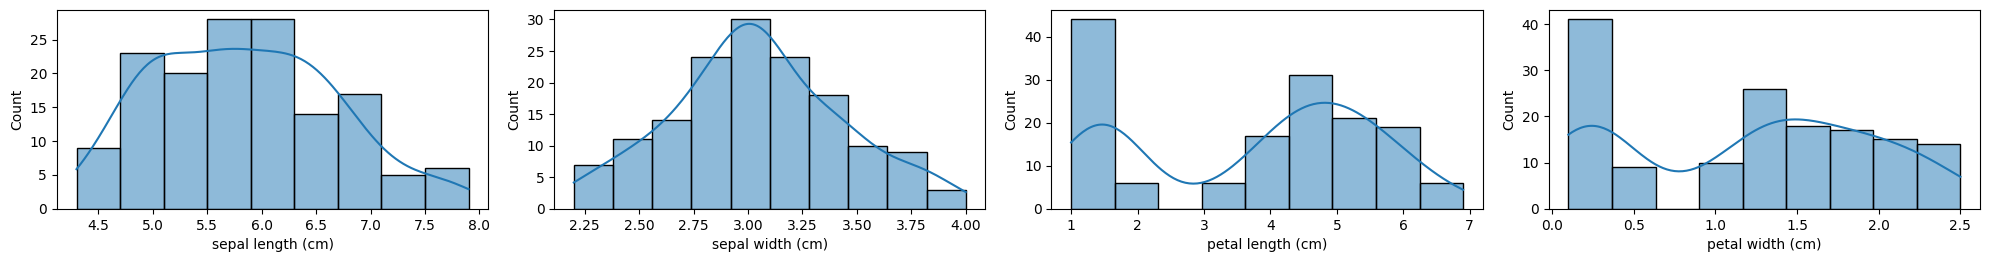

In [9]:
df = remover_outliers(df= df, colunas=df.drop('species', axis=1).columns.tolist())
boxplot(df)
histogram(df)

# Feature Engineering

In [10]:
df["petal_area"] = df["petal length (cm)"] * df["petal width (cm)"]
df["sepal_area"] = df["sepal length (cm)"] * df["sepal width (cm)"]
df["petal_prop"] = df["petal length (cm)"] / df["petal width (cm)"]
df["sepal_prop"] = df["sepal length (cm)"] / df["sepal width (cm)"]

In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal_area,sepal_area,petal_prop,sepal_prop
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.040411,3.758000,1.199333,5.794067,17.726632,4.310500,1.958116
std,0.828066,0.392476,1.765298,0.762238,4.712390,3.215994,2.489648,0.388249
min,4.300000,2.200000,1.000000,0.100000,0.110000,10.350000,2.125000,1.277778
25%,5.100000,2.800000,1.600000,0.300000,0.420000,15.660000,2.802381,1.573733
50%,5.800000,3.000000,4.350000,1.300000,5.615000,17.500000,3.300000,2.030777
75%,6.400000,3.300000,5.100000,1.800000,9.690000,20.010000,4.666667,2.220238
max,7.900000,4.000000,6.900000,2.500000,15.870000,30.020000,15.000000,2.961538


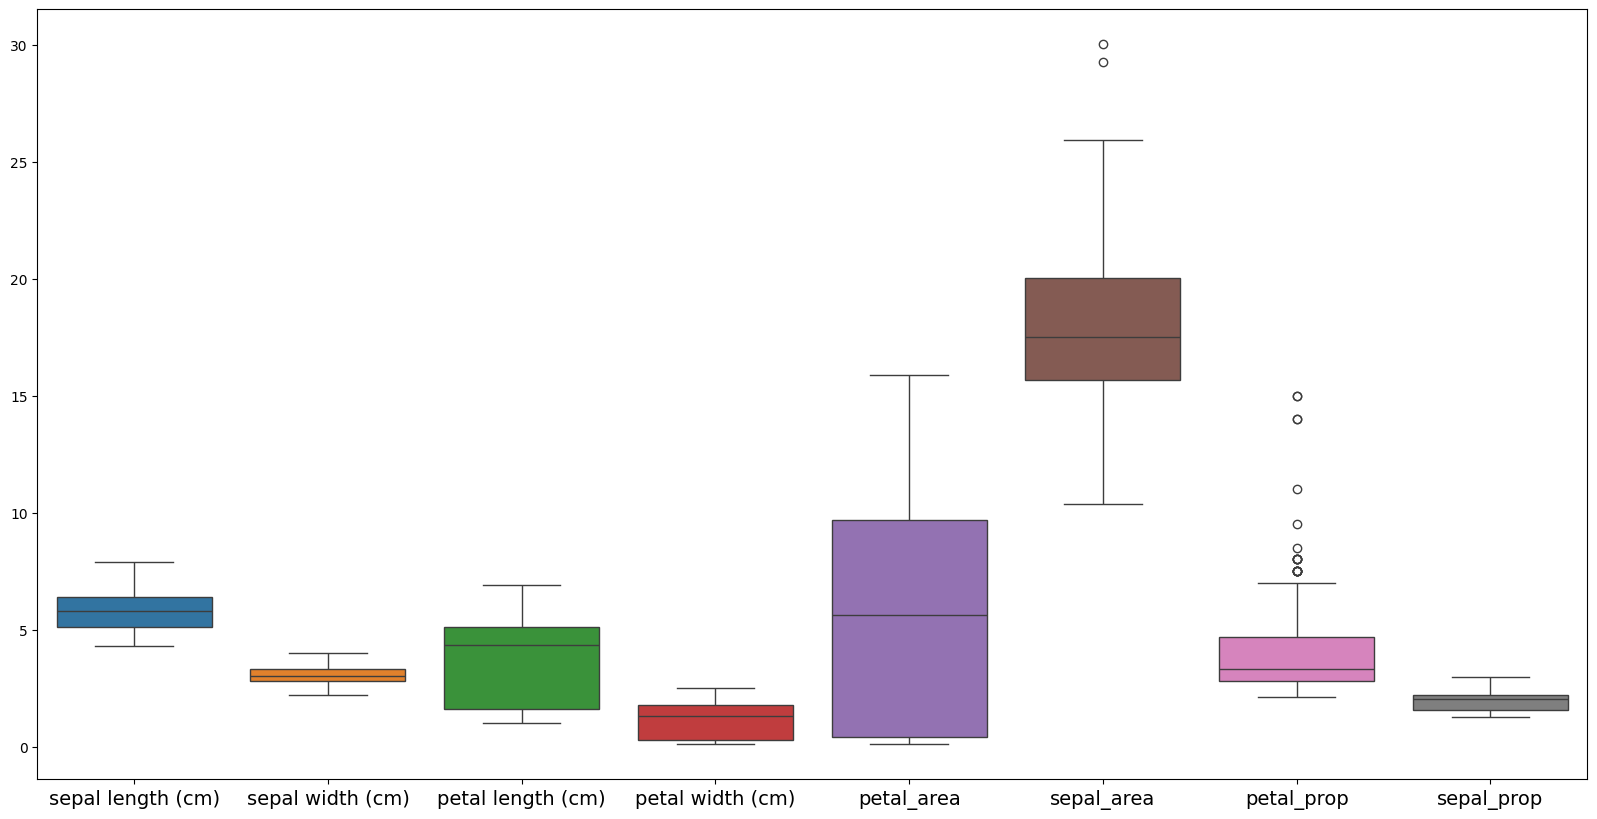

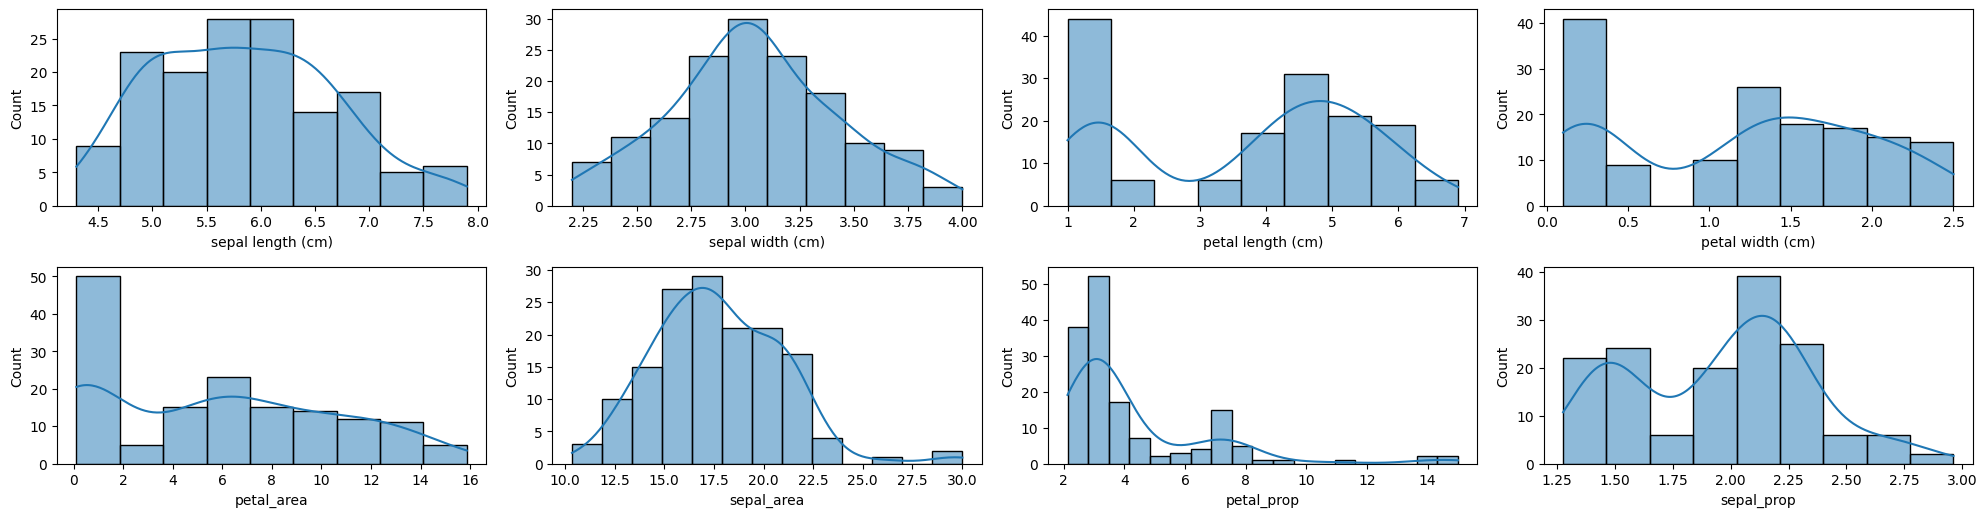

In [12]:
boxplot(df)
histogram(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal_area,sepal_area,petal_prop,sepal_prop
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.040411,3.758000,1.199333,5.794067,17.726632,4.310500,1.958116
std,0.828066,0.392476,1.765298,0.762238,4.712390,3.215994,2.489648,0.388249
min,4.300000,2.200000,1.000000,0.100000,0.110000,10.350000,2.125000,1.277778
25%,5.100000,2.800000,1.600000,0.300000,0.420000,15.660000,2.802381,1.573733
50%,5.800000,3.000000,4.350000,1.300000,5.615000,17.500000,3.300000,2.030777
75%,6.400000,3.300000,5.100000,1.800000,9.690000,20.010000,4.666667,2.220238
max,7.900000,4.000000,6.900000,2.500000,15.870000,30.020000,15.000000,2.961538


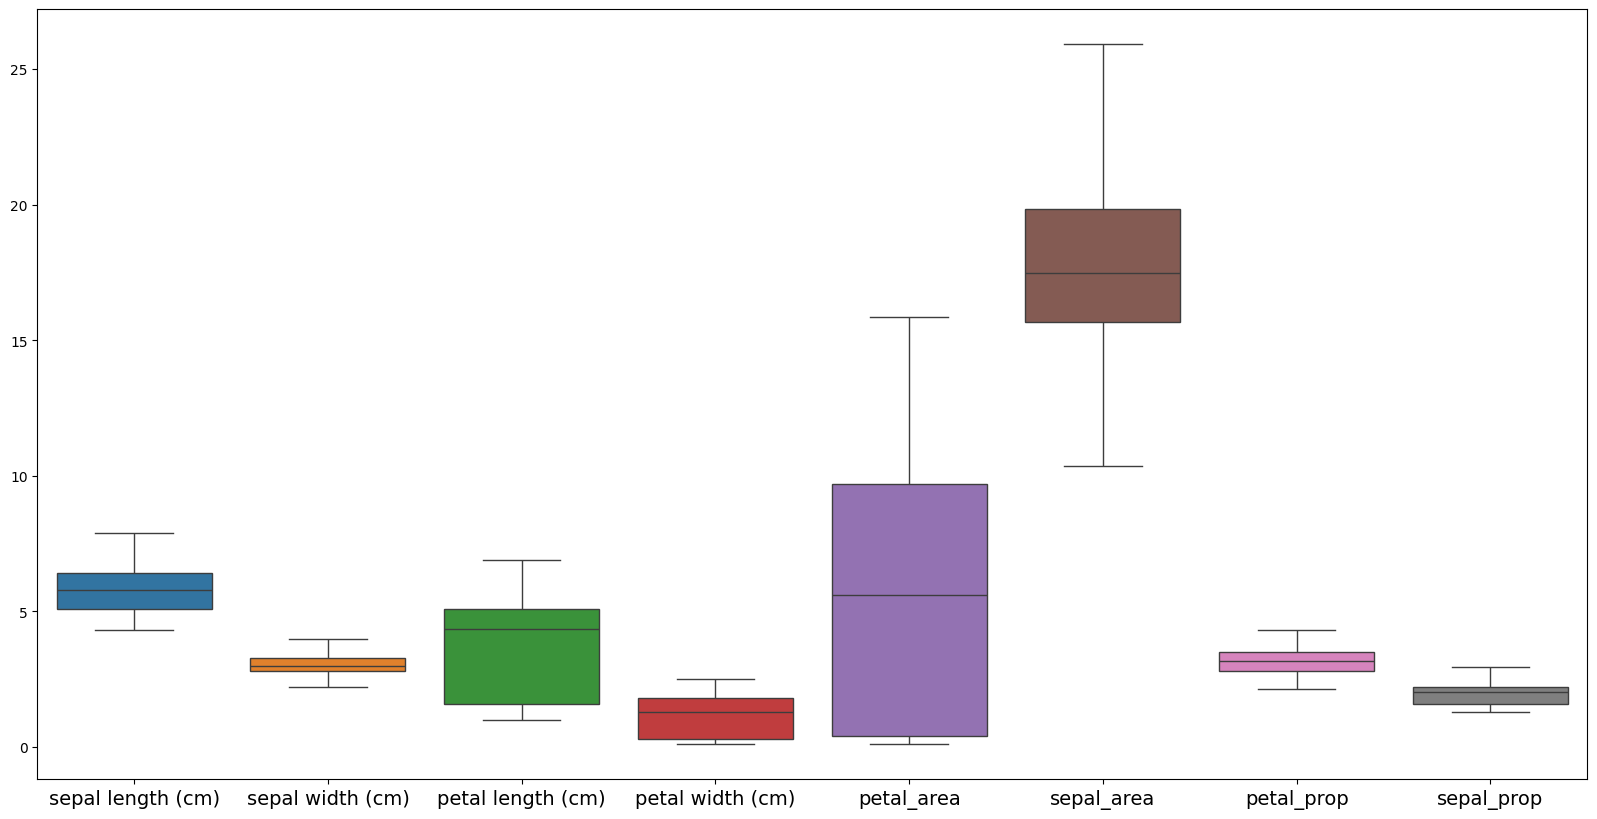

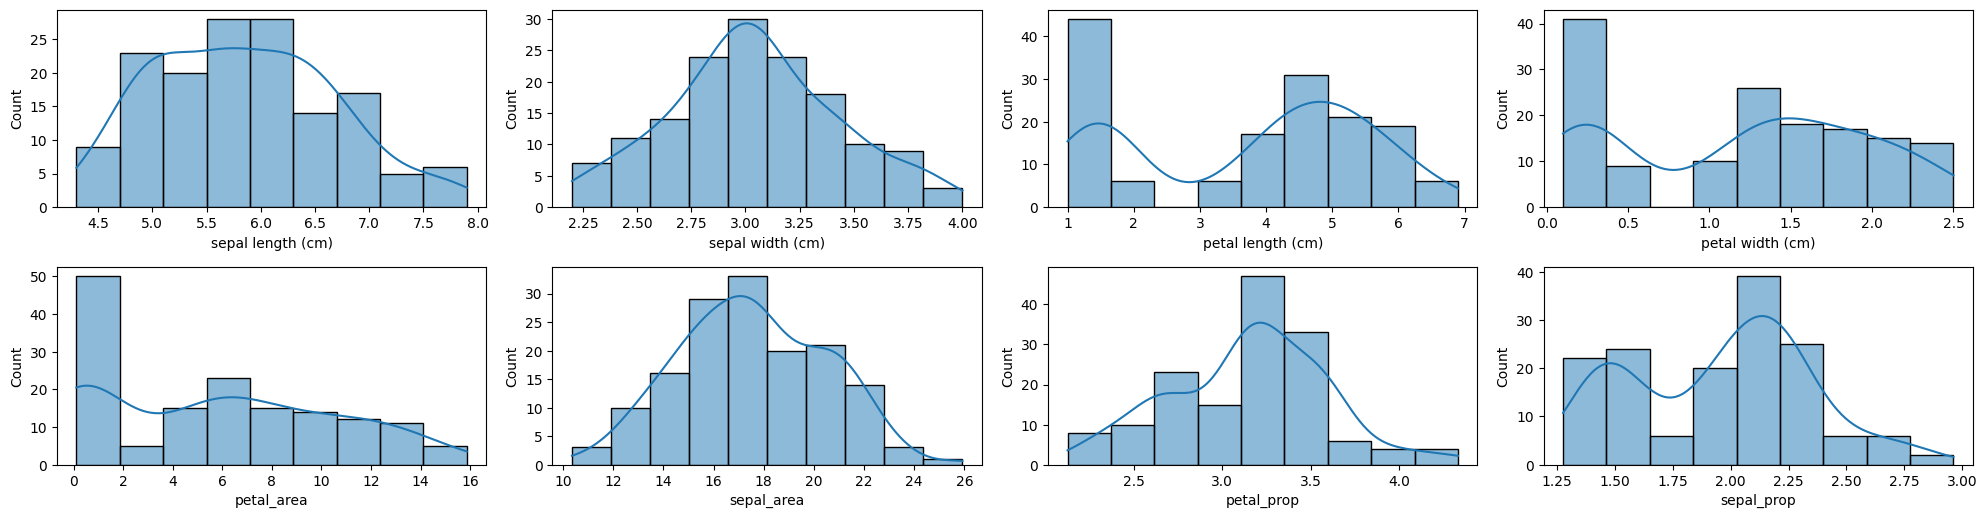

In [13]:
display(df.describe())
for i in range(5):
    df = remover_outliers(df= df, colunas=df.drop('species', axis=1).columns.tolist())
    i += 1
boxplot(df)
histogram(df)

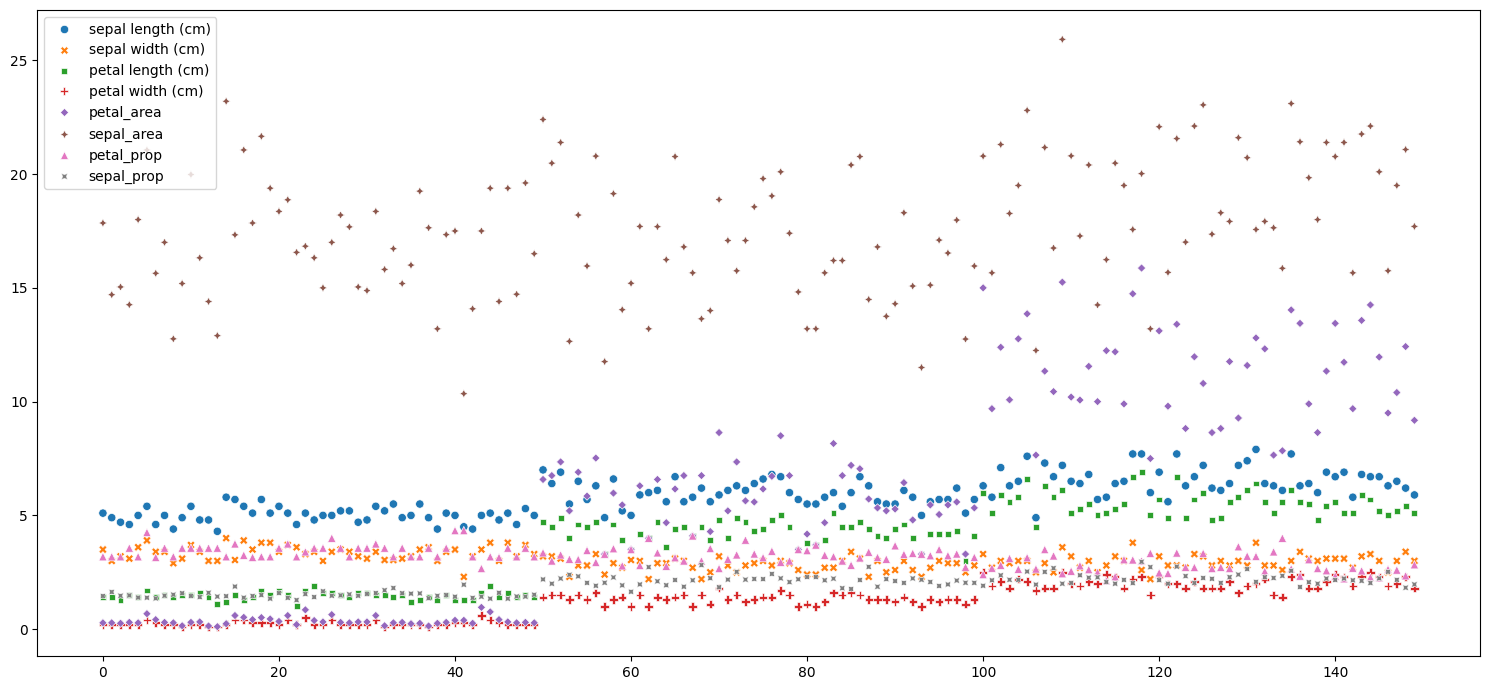

In [14]:
plt.figure(figsize= (15,7))
sns.scatterplot(data=df.drop('species', axis=1))

plt.tight_layout()
plt.show()

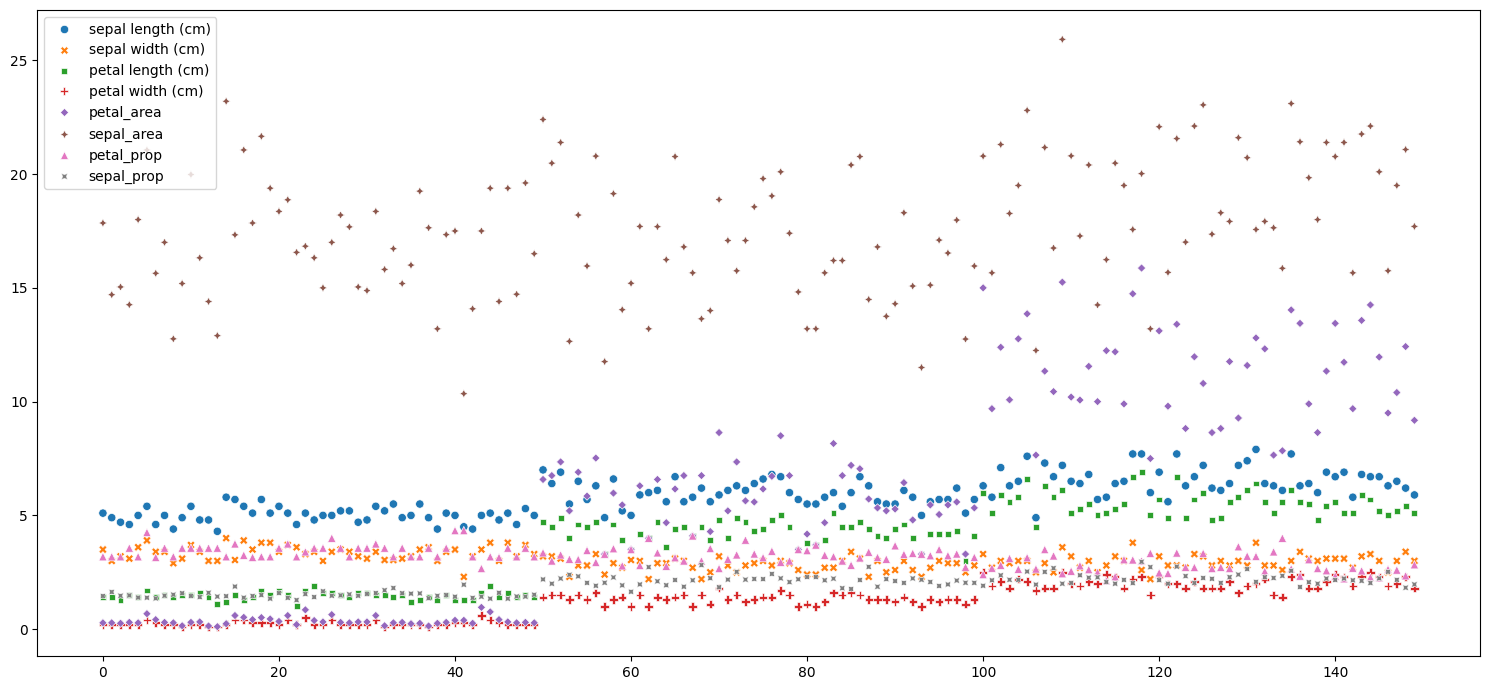

In [15]:
plt.figure(figsize= (15,7))
sns.scatterplot(data=df.drop('species', axis=1))

plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(df.drop('species', axis=1))
y = df['species']



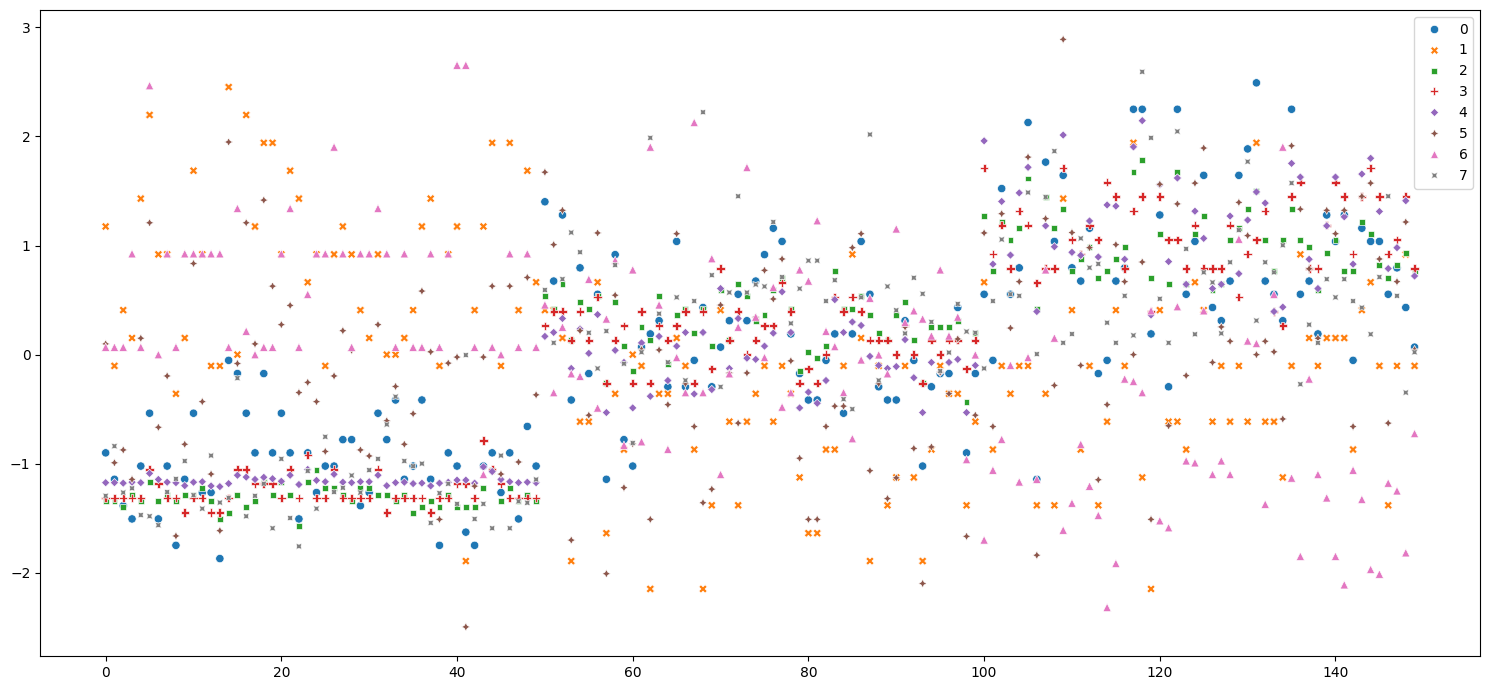

In [17]:
plt.figure(figsize= (15,7))
sns.scatterplot(data=X)

plt.tight_layout()
plt.show()

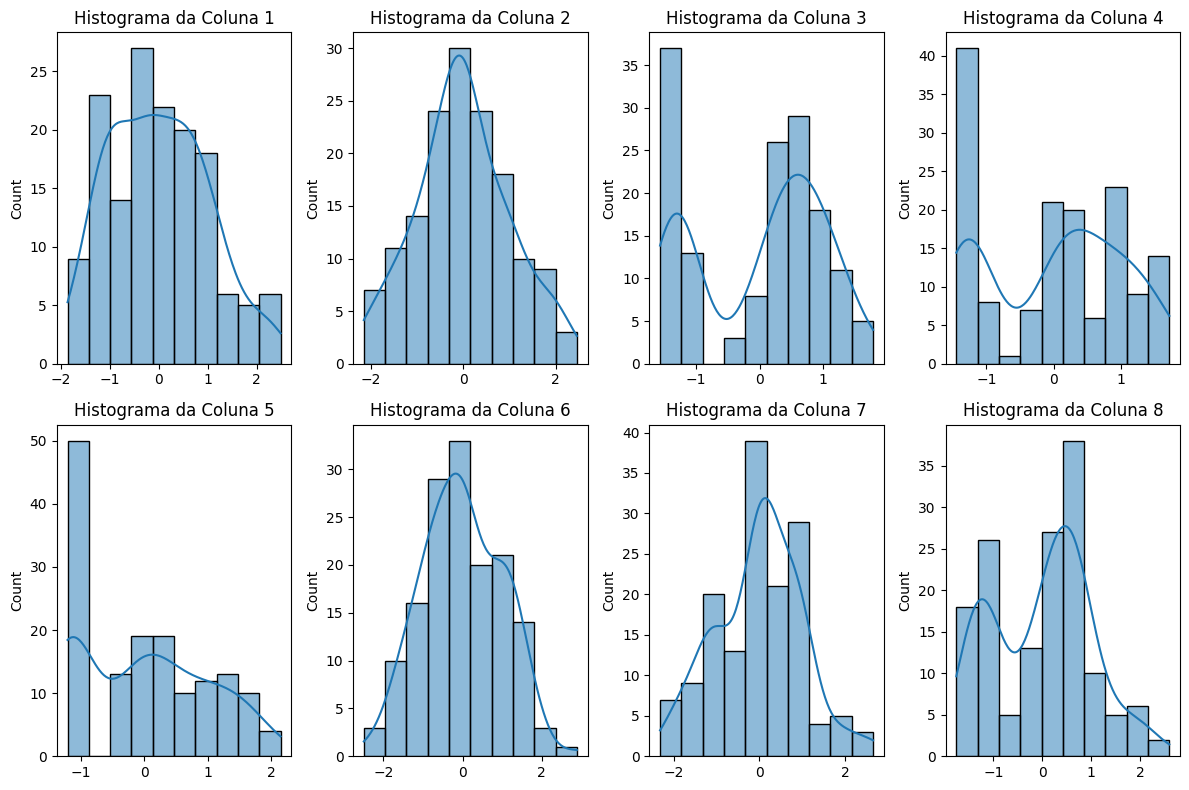

In [18]:
plt.figure(figsize=(12, 8))

for i in range(X.shape[1]):
    plt.subplot(2, 4, i+1)
    sns.histplot(X[:, i], bins=10, edgecolor='black', kde = True)
    plt.title(f'Histograma da Coluna {i+1}')

plt.tight_layout()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

seed = 42


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)



In [20]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score



dummy_clf = DummyClassifier(strategy="most_frequent", random_state=seed)

dummy_clf.fit(X_train, y_train)


y_test_pred = dummy_clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}')

Acurácia no conjunto de teste: 0.29


# Teste inicial para Naive Bayes e Support Vector Machine

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

kernels = ['linear', 'poly', 'rbf', 'sigmoid'] #'precomputed' não foi utilizado pois precisa de uma matriz quadrada

for i in kernels:
    svm = SVC(kernel=i, random_state= 42)
    
    # Cross-validation com 5 folds
    scores = cross_val_score(svm, X_train, y_train, cv=5)
    
    print(f'Kernel: {i}')
    print(f'Acurácia média no Cross-Validation: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})\n')

# Após escolher o melhor kernel, podemos treinar e testar no conjunto final
best_kernel = 'linear'  # Substitua pelo melhor kernel encontrado
svm_best = SVC(kernel=best_kernel)
svm_best.fit(X_train, y_train)




y_test_pred = svm_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia final no conjunto de teste para kernel {best_kernel}: {test_accuracy:.2f}')


Kernel: linear
Acurácia média no Cross-Validation: 0.95 (+/- 0.07)

Kernel: poly
Acurácia média no Cross-Validation: 0.88 (+/- 0.07)

Kernel: rbf
Acurácia média no Cross-Validation: 0.93 (+/- 0.06)

Kernel: sigmoid
Acurácia média no Cross-Validation: 0.92 (+/- 0.05)

Acurácia final no conjunto de teste para kernel linear: 0.97


In [22]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB


methods = [GaussianNB, BernoulliNB]  # Apenas métodos que aceitam valores negativos   / MultinomialNB, CategoricalNB e ComplementNB não aceita valores negativos

for method in methods:
    naive = method()

    # Cross-validation com 5 folds
    scores = cross_val_score(naive, X_train, y_train, cv=5)

    print(f'Método: {method.__name__}')
    print(f'Acurácia média no Cross-Validation: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})\n')


best_method = GaussianNB  # Substitua pelo melhor encontrado
naive_best = best_method()
naive_best.fit(X_train, y_train)





y_test_pred = naive_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia final no conjunto de teste para {best_method.__name__}: {test_accuracy:.2f}')

best_method = BernoulliNB  # Substitua pelo melhor encontrado
naive_best = best_method()
naive_best.fit(X_train, y_train)





y_test_pred = naive_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia final no conjunto de teste para {best_method.__name__}: {test_accuracy:.2f}')


Método: GaussianNB
Acurácia média no Cross-Validation: 0.94 (+/- 0.06)

Método: BernoulliNB
Acurácia média no Cross-Validation: 0.79 (+/- 0.02)

Acurácia final no conjunto de teste para GaussianNB: 1.00
Acurácia final no conjunto de teste para BernoulliNB: 0.82


# Definitivos

## SVC

In [23]:
svm = SVC(kernel='linear', C= 0.1, random_state= seed, class_weight='balanced')
svm.fit(X_train, y_train)



y_test_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia final no conjunto de teste para kernel {best_kernel}: {test_accuracy:.6f}')

Acurácia final no conjunto de teste para kernel linear: 0.973684


## GaussianNB


In [24]:

gaussian = GaussianNB(var_smoothing= 1e-1)  
gaussian.fit(X_train, y_train)





y_test_pred = gaussian.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia final no conjunto de teste para GaussianNB: {test_accuracy:.6f}')

Acurácia final no conjunto de teste para GaussianNB: 0.973684
